<a href="https://colab.research.google.com/github/VinaySingh561/LARGE-LANGUAGE-MODELS/blob/main/Simplified_Attention_Mechanism.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
## let's say we have a input tensor embedding
import torch
vocab_size = 5
dim =3
input_tensor = torch.nn.Embedding(vocab_size, dim)
print(input_tensor)

Embedding(5, 3)


In [3]:
input_tensor_embeddings = input_tensor(torch.arange(vocab_size))
print(input_tensor_embeddings)

tensor([[ 0.6864,  0.0199,  0.6819],
        [-1.0123, -0.9980, -0.5006],
        [ 1.1775, -2.4291, -0.9669],
        [-0.8991, -2.3274,  0.6725],
        [-1.3175,  0.1503,  0.5871]], grad_fn=<EmbeddingBackward0>)


In [8]:
# now we want to calcualte attention score for token 2
query = input_tensor_embeddings[2]

attention_scores_2 = torch.empty(input_tensor_embeddings.shape[0])
for i, x_i in enumerate(input_tensor_embeddings):
  attention_scores_2[i] = torch.dot(x_i,query)
print(f"Attention scores for query 2 is : {attention_scores_2.detach()}")

Attention scores for query 2 is : tensor([ 0.1004,  1.7163,  8.2217,  3.9447, -2.4841])


In [13]:
# now we need to normalize these scores to make them equiavalent to probs
attention_weights = torch.softmax(attention_scores_2.detach(), dim =0)
print(attention_weights)

tensor([2.9255e-04, 1.4723e-03, 9.8454e-01, 1.3669e-02, 2.2068e-05])


In [14]:
print(torch.sum
      (attention_weights))

tensor(1.)


In [21]:
## now calculate context vector using attention weights
context_vector_2 = torch.matmul(input_tensor_embeddings.T,attention_weights)
print(context_vector_2)

tensor([ 1.1457, -2.4248, -0.9433], grad_fn=<MvBackward0>)


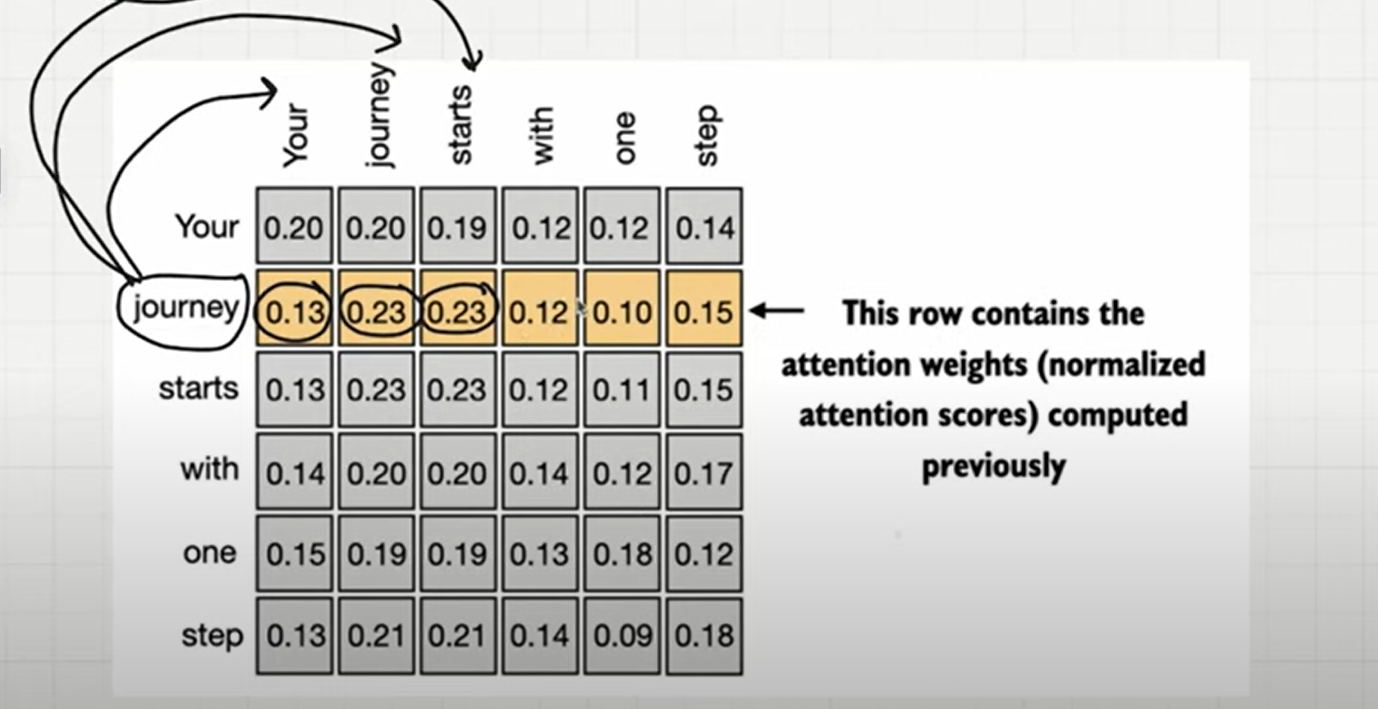

In [33]:
### now calulcating context vector for all the vectors
attention_matrix = torch.matmul(input_tensor_embeddings.detach(),input_tensor_embeddings.detach().T)
print(attention_matrix.shape)
print(attention_matrix)

torch.Size([5, 5])
tensor([[ 0.9365, -1.0561,  0.1004, -0.2049, -0.5009],
        [-1.0561,  2.2714,  1.7163,  2.8962,  0.8897],
        [ 0.1004,  1.7163,  8.2217,  3.9447, -2.4841],
        [-0.2049,  2.8962,  3.9447,  6.6775,  1.2294],
        [-0.5009,  0.8897, -2.4841,  1.2294,  2.1030]])


In [38]:
# context vector for all the words
context_vector = torch.matmul(attention_matrix,input_tensor_embeddings.detach())
print(f"Initial embedding vectos \n {input_tensor_embeddings.detach()}")
print(f"Context vector\n {context_vector.shape}")
print(context_vector)

Initial embedding vectos 
 tensor([[ 0.6864,  0.0199,  0.6819],
        [-1.0123, -0.9980, -0.5006],
        [ 1.1775, -2.4291, -0.9669],
        [-0.8991, -2.3274,  0.6725],
        [-1.3175,  0.1503,  0.5871]])
Context vector
 torch.Size([5, 3])
tensor([[  2.6743,   1.2305,   0.6384],
        [ -4.7794, -13.0640,  -1.0467],
        [  7.7384, -31.2364,  -7.5458],
        [ -6.0510, -27.8331,  -0.1911],
        [ -8.0454,   2.5909,   3.6764]])
